In [43]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

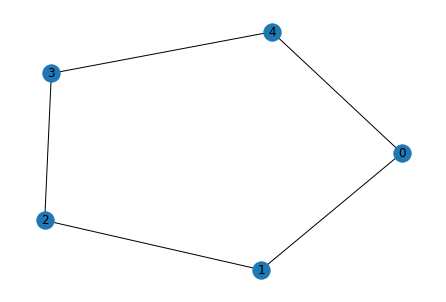

In [2]:
# Draw a circulant graph
circulant_graph = nx.circulant_graph(5, [1])
nx.draw(circulant_graph, with_labels=True)

## Degree centrality

In [4]:
# Degree distribution
circulant_graph.degree()

DegreeView({0: 2, 1: 2, 2: 2, 3: 2, 4: 2})

In [5]:
# Degree centrality
nx.degree_centrality(circulant_graph)

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}

\begin{equation}
C_{D}(x) = \frac{k_i}{n-1}
\end{equation}

In [11]:
circulant_graph_degrees = [degree for node, degree in circulant_graph.degree()]
circulant_degree_centrality = list(nx.degree_centrality(circulant_graph).values())

In [16]:
node_count = len(circulant_graph.nodes)
degree_centrality_hat = [degree / (node_count - 1) for degree in circulant_graph_degrees]
degree_centrality_hat

[0.5, 0.5, 0.5, 0.5, 0.5]

In [17]:
np.testing.assert_array_equal(degree_centrality_hat, circulant_degree_centrality)

## Eigenvector centrality

### Eigenvectors and eigenvalues

In [60]:
A = np.array([[0, 1], [-2, -3]])
value, vectors = np.linalg.eig(A)
value

array([-1., -2.])

In [51]:
# Numpy returns normalised results
1 / np.linalg.norm([1, -1])

0.7071067811865475

### Eigenvector centrality

$$
\textbf{Eigenvector centrality is based on the concept of importance of neigbours}. \\
$$

\begin{equation*}
C_{E}(x_{i}) = \kappa^{-1} \sum_{j \in neighbors(i)} C_E(x_{j})
\end{equation*}
\begin{equation*}
C_{E}(x_{i}) = \kappa^{-1} \sum_{j=1}^{n} A_{ij}C_E(x_{j})
\end{equation*}

$$
\textbf{Rewriting in matrix notation:} \\
$$
\begin{equation*}
    \textbf{C} = \kappa^{-1} \textbf{A}\textbf{C}
\end{equation*}
\begin{equation*}
    \textbf{C} \kappa =  \textbf{A}\textbf{C}
\end{equation*}

In [136]:
# Find expected values of centrality
eigen_vector_centrality = list(nx.eigenvector_centrality(circulant_graph).values())
eigen_vector_centrality

[0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579]

In [143]:
# Compute adjacency matrix and its eigenvalues
A = nx.adjacency_matrix(circulant_graph).todense()
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [144]:
# Find the largest eigenvalue
largest_eigenvalue = np.argmax(eigenvalues)
largest_eigenvalue

2

In [145]:
# Find the corresponding eigenvector
primary_eigen_vector = eigenvectors[:, largest_eigenvalue].flatten().A1
primary_eigen_vector

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])

In [146]:
# Find the normalising denominator
norm = np.sign(primary_eigen_vector.sum()) * np.linalg.norm(primary_eigen_vector)
norm

-1.0

In [138]:
# Compute the actual values for the centrality
eigen_vector_centrality_hat = primary_eigen_vector / norm
eigen_vector_centrality_hat

array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136])

In [147]:
# Check if implementation is correct
np.testing.assert_array_almost_equal(eigen_vector_centrality_hat, eigen_vector_centrality)

In [140]:
def compute_eigenvector_centrality(graph):
    # Generate adjacency matrix
    A = nx.adjacency_matrix(graph).todense()

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Find the index of the largest eigenvalue
    largest_eigenvalue = np.argmax(eigenvalues)

    # Find the eigenvector corresponding to the largest eigenvalue
    primary_eigen_vector = eigenvectors[:, largest_eigenvalue].flatten().A1

    # Compute the norm of the eigenvector
    norm = np.sign(primary_eigen_vector.sum()) * np.linalg.norm(primary_eigen_vector)

    # Compute the eigenvector centrality
    eigen_vector_centrality = primary_eigen_vector / norm

    return eigen_vector_centrality

In [141]:
np.testing.assert_array_almost_equal(compute_eigenvector_centrality(circulant_graph), eigen_vector_centrality)